In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

2025-08-06 05:22:48.102223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754457768.300281      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754457768.353736      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
final_df=pd.read_csv("/kaggle/input/final-df/final_df_processed.csv")

In [3]:
# Step 1: Drop missing values
df = final_df.dropna()

# Step 2: Features and target
features = ['Carga Real_forecast', 'temperature_loc1', 'temperature_loc2', 'temperature_loc3']
target = 'Carga Real_actual'

# Step 3: Normalize
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

In [4]:
df.head()

,Fecha Hora,Carga Real_actual,Carga Real_forecast,temperature_loc1,temperature_loc2,temperature_loc3
0,2016-01-02 00:00:00,1004.4597,1056.9,296.89752,298.60065,300.06940
1,2016-01-02 00:00:00,1004.4597,1056.9,296.89752,298.60846,300.06940
2,2016-01-02 01:00:00,978.7889,1057.1,296.63240,298.23395,299.85895
3,2016-01-02 01:00:00,978.7889,1057.1,296.63240,298.21832,299.85895
4,2016-01-02 02:00:00,954.4416,996.5,296.53757,297.95944,299.68600


In [5]:

# Step 4: Create sequences
def create_sequences(X, y, seq_len):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len])
    return np.array(Xs), np.array(ys)

seq_len = 24
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_len)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


In [6]:
'''
# Step 6: LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Step 7: Training
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Step 8: Prediction and inverse transform
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Step 9: Results as DataFrame
results = pd.DataFrame({
    'Actual Load': y_true.flatten(),
    'Predicted Load': y_pred.flatten()
})
results.head()
'''

"\n# Step 6: LSTM model\nmodel = Sequential([\n    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),\n    Dense(1)\n])\nmodel.compile(optimizer='adam', loss='mse')\n\n# Step 7: Training\nmodel.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)\n\n# Step 8: Prediction and inverse transform\ny_pred_scaled = model.predict(X_test)\ny_pred = scaler_y.inverse_transform(y_pred_scaled)\ny_true = scaler_y.inverse_transform(y_test)\n\n# Step 9: Results as DataFrame\nresults = pd.DataFrame({\n    'Actual Load': y_true.flatten(),\n    'Predicted Load': y_pred.flatten()\n})\nresults.head()\n"

In [7]:
'''
# Step 8: Prediction and inverse transform
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Step 9: Results as DataFrame
results = pd.DataFrame({
    'Actual Load': y_true.flatten(),
    'Predicted Load': y_pred.flatten()
})
results.head()
'''

"\n# Step 8: Prediction and inverse transform\ny_pred_scaled = model.predict(X_test)\ny_pred = scaler_y.inverse_transform(y_pred_scaled)\ny_true = scaler_y.inverse_transform(y_test)\n\n# Step 9: Results as DataFrame\nresults = pd.DataFrame({\n    'Actual Load': y_true.flatten(),\n    'Predicted Load': y_pred.flatten()\n})\nresults.head()\n"

In [8]:

'''
# Define model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile
model.compile(optimizer='adam', loss='mse')

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

'''

"\n# Define model\nmodel = Sequential()\nmodel.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(64, return_sequences=False))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1))\n\n# Compile\nmodel.compile(optimizer='adam', loss='mse')\n\n# Add early stopping\nearly_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)\n\n"

In [9]:
# Hyperparameters (chosen based on your chart)
sequence_length = 48           # use past 2 days
units_1 = 128                  # high capacity first LSTM layer
units_2 = 64                   # moderate second layer
dropout = 0.2                  # moderate regularization
recurrent_dropout = 0.1        # stabilize memory
batch_size = 32                # balanced batch
learning_rate = 0.001          # tuned manually
optimizer = RMSprop(learning_rate=learning_rate)  # often better than Adam for RNNs

# Define LSTM model
model = Sequential()
model.add(LSTM(units_1, return_sequences=True, 
               recurrent_dropout=recurrent_dropout, 
               dropout=dropout,
               input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units_2, return_sequences=False, 
               recurrent_dropout=recurrent_dropout,
               dropout=dropout))
model.add(Dense(1))  # Regression output

# Compile with MAPE for monitoring
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


I0000 00:00:1754457781.438479      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_mape', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=batch_size,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 218s 114ms/step - loss: 0.0139 - mae: 0.0838 - mape: 8645.9053 - val_loss: 0.0110 - val_mae: 0.0918 - val_mape: 12.5117
Epoch 2/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 206s 114ms/step - loss: 0.0037 - mae: 0.0458 - mape: 41131.1094 - val_loss: 0.0127 - val_mae: 0.0971 - val_mape: 13.0372
Epoch 3/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 205s 113ms/step - loss: 0.0030 - mae: 0.0409 - mape: 31943.4727 - val_loss: 0.0137 - val_mae: 0.1055 - val_mape: 14.5017
Epoch 4/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 205s 114ms/step - loss: 0.0025 - mae: 0.0374 - mape: 34961.8555 - val_loss: 0.0127 - val_mae: 0.1000 - val_mape: 13.6112
Epoch 5/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 205s 114ms/step - loss: 0.0023 - mae: 0.0362 - mape: 9660.8516 - val_loss: 0.0245 - val_mae: 0.1455 - val_mape: 20.0592
Epoch 6/100
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 200s 111ms/step - loss: 0.0023 - mae: 0.0354 - mape: 25355.8750 - val_loss: 0.0225 - val_mae: 0.1386 - val_mape: 19.0757
Epoch 7/100
1806/1

In [11]:
'''
# Train
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


'''

'\n# Train\nhistory = model.fit(\n    X_train, y_train,\n    epochs=100,\n    batch_size=32,\n    validation_split=0.1,\n    callbacks=[early_stop],\n    verbose=1\n)\n\n\n'

In [12]:
# Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Results
results = pd.DataFrame({
    'Actual Load': y_true.flatten(),
    'Predicted Load': y_pred.flatten()
})

502/502 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step


📊 Mean Absolute Error (MAE): 120.63
📊 Root Mean Squared Error (RMSE): 147.43
📊 Mean Absolute Percentage Error (MAPE): 9.63%


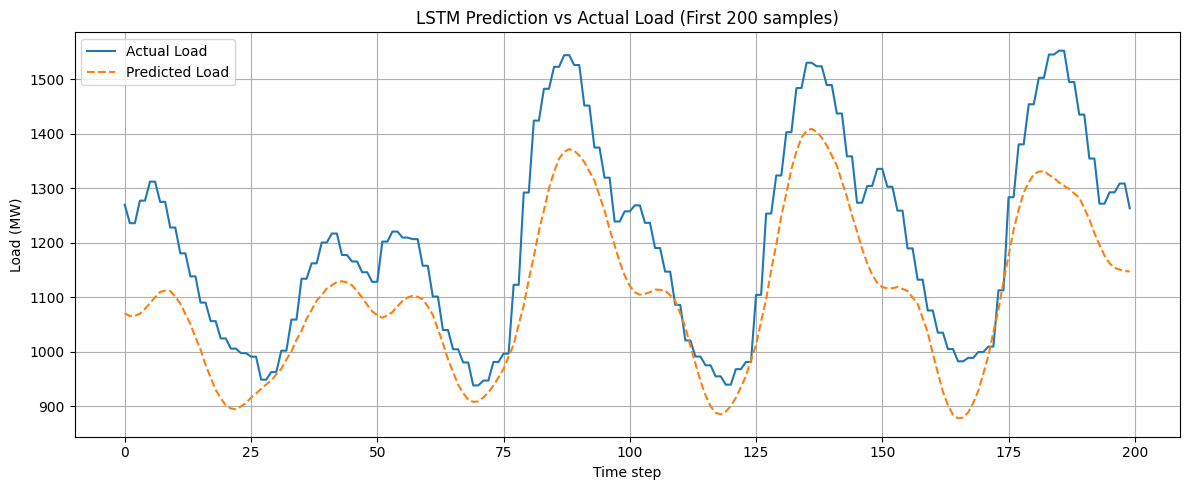

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Ensure you've already predicted and inverse-transformed:
# y_pred = scaler_y.inverse_transform(y_pred_scaled)
# y_true = scaler_y.inverse_transform(y_test)

# 1. Evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"📊 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📊 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 2. Plot predictions
plt.figure(figsize=(12, 5))
plt.plot(y_true[:200], label='Actual Load')
plt.plot(y_pred[:200], label='Predicted Load', linestyle='--')
plt.title('LSTM Prediction vs Actual Load (First 200 samples)')
plt.xlabel('Time step')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
